<a href="https://colab.research.google.com/github/SurajKande/python-pandas/blob/master/python_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#python pandas Basics:
pandas is an open source library, providing high-performance, easy-to-use data structures and data analysis tools for Python.

The DataFrame is one of Pandas' most important data structures. It's basically a way to store tabular data where you can label the rows and the columns. One way to build a DataFrame is from a dictionary

In [0]:
# Pre-defined lists

names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
dr =  [True, False, False, False, True, True, True]
cpc = [809, 731, 588, 18, 200, 70, 45]


# Import pandas as pd
import pandas as pd

# Create dictionary my_dict with three key:value pairs: my_dict
my_dict={'country':names,
          'drives_right':dr,
          'cars_per_cap':cpc }

# Build a DataFrame from a dictonary
cars = pd.DataFrame(my_dict)          #here name of data frame is cars

# Specify row labels of cars
row_labels = ['US', 'AUS', 'JPN', 'IN', 'RU', 'MOR', 'EG']
cars.index = row_labels

Putting data in a dictionary and then building a DataFrame works, but it's not very efficient. What if you're dealing with millions of observations? In those cases, the data is typically available as files with a regular structure. One of those file types is the CSV file, 


to import CSV data into Python as a Pandas DataFrame you can use read_csv().

In [0]:
#to read data from a csv file
df = pd.read_csv('cars.csv')    

index_col, an argument of read_csv(), that you can use to specify which column  
in the CSV file should be used as a row label

In [0]:
df = pd.read_csv('cars.csv',index_col=0)

we can index and select Pandas DataFrames in many different ways.              
The simplest way is to use Square brackets.

In [75]:
data_frame = cars    # cars data used here is created in cell 1
print(type(data_frame))

<class 'pandas.core.frame.DataFrame'>


In [76]:
# Print out country column as Pandas Series
print(data_frame["country"])
print(type(data_frame["country"]))

US     United States
AUS        Australia
JPN            Japan
IN             India
RU            Russia
MOR          Morocco
EG             Egypt
Name: country, dtype: object
<class 'pandas.core.series.Series'>


In [77]:
# Print out country column as Pandas DataFrame
print(data_frame[["country"]])
print(type(data_frame[["country"]]))

           country
US   United States
AUS      Australia
JPN          Japan
IN           India
RU          Russia
MOR        Morocco
EG           Egypt
<class 'pandas.core.frame.DataFrame'>


In [78]:
# Print out DataFrame with country and drives_right columns
print(data_frame[["country", "drives_right"]])
print(type(data_frame[["country", "drives_right"]]))

           country  drives_right
US   United States          True
AUS      Australia         False
JPN          Japan         False
IN           India         False
RU          Russia          True
MOR        Morocco          True
EG           Egypt          True
<class 'pandas.core.frame.DataFrame'>


**Pandas Series** is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.).

 The axis labels are collectively called index. Pandas Series is nothing but a column in an excel sheet.

In [79]:
data_frame

,country,drives_right,cars_per_cap
US,United States,True,809
AUS,Australia,False,731
JPN,Japan,False,588
IN,India,False,18
RU,Russia,True,200
MOR,Morocco,True,70
EG,Egypt,True,45


In [80]:
# Print out first 3 observations
print(data_frame[0:3])

           country  drives_right  cars_per_cap
US   United States          True           809
AUS      Australia         False           731
JPN          Japan         False           588


In [81]:
# to read first 5 rows of a dataframe
data_frame.head()

,country,drives_right,cars_per_cap
US,United States,True,809
AUS,Australia,False,731
JPN,Japan,False,588
IN,India,False,18
RU,Russia,True,200


In [82]:
# to read last 5 rows of a dataframe
data_frame.tail()

,country,drives_right,cars_per_cap
JPN,Japan,False,588
IN,India,False,18
RU,Russia,True,200
MOR,Morocco,True,70
EG,Egypt,True,45


In [83]:
#to print out the  columns index
data_frame.columns

Index(['country', 'drives_right', 'cars_per_cap'], dtype='object')

In [84]:
#to know the number of rows and columns of the data
data_frame.shape

(7, 3)

In [85]:
#to get additional info
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, US to EG
Data columns (total 3 columns):
country         7 non-null object
drives_right    7 non-null bool
cars_per_cap    7 non-null int64
dtypes: bool(1), int64(1), object(1)
memory usage: 175.0+ bytes


###Methods to access the data frame
1. ***loc*** :  is label-based, which means that you have to specify rows and columns based on their row and column labels. 

2. ***iloc*** : is integer index based, so you have to specify rows and columns by their integer index

In [86]:
# Print out observation for Japan
print(data_frame.loc['JPN'])    #using loc to print 
print(data_frame.iloc[2])       #using iloc to print 

country         Japan
drives_right    False
cars_per_cap      588
Name: JPN, dtype: object
country         Japan
drives_right    False
cars_per_cap      588
Name: JPN, dtype: object


In [87]:
# Print out observations for Australia and Egypt
print(data_frame.loc[["AUS","EG"]])
print(data_frame.iloc[[1,6]])


       country  drives_right  cars_per_cap
AUS  Australia         False           731
EG       Egypt          True            45
       country  drives_right  cars_per_cap
AUS  Australia         False           731
EG       Egypt          True            45


In [88]:
# Print out drives_right value of Morocco
print(data_frame.loc["MOR"]["drives_right"])

True


In [89]:
# Print sub-DataFrame
print(data_frame.loc[["RU", "MOR"], ["country", "drives_right"]])

     country  drives_right
RU    Russia          True
MOR  Morocco          True


In [91]:
# Print out drives_right column as Series
print(data_frame["drives_right"])
print(type(data_frame["drives_right"]))

US      True
AUS    False
JPN    False
IN     False
RU      True
MOR     True
EG      True
Name: drives_right, dtype: bool
<class 'pandas.core.series.Series'>


In [92]:
# Print out drives_right column as DataFrame
print(data_frame[["drives_right"]])
print("")
print(type(data_frame[["drives_right"]]))

     drives_right
US           True
AUS         False
JPN         False
IN          False
RU           True
MOR          True
EG           True

<class 'pandas.core.frame.DataFrame'>


In [93]:
# Print out cars_per_cap and drives_right as DataFrame
print(data_frame[["cars_per_cap", "drives_right"]])

     cars_per_cap  drives_right
US            809          True
AUS           731         False
JPN           588         False
IN             18         False
RU            200          True
MOR            70          True
EG             45          True


In [94]:
#subsetting a dataframe
sel = data_frame[data_frame['drives_right']]
print(sel)

           country  drives_right  cars_per_cap
US   United States          True           809
RU          Russia          True           200
MOR        Morocco          True            70
EG           Egypt          True            45


In [95]:
# observations that have a cars_per_cap over 500
cars_maniac = cars[cars["cars_per_cap"] > 500]
print(cars_maniac)

           country  drives_right  cars_per_cap
US   United States          True           809
AUS      Australia         False           731
JPN          Japan         False           588


###using logical operators:
 * np.logical_and()
 * np.logical_or()
 * np.logical_not() 

  we use them on Pandas Series to do more advanced filtering operations.

In [98]:
import numpy as np
# observations with cars_per_cap between 100 and 500
medium = data_frame[np.logical_and( data_frame["cars_per_cap"] > 100, data_frame["cars_per_cap"] < 500 )]
medium

,country,drives_right,cars_per_cap
RU,Russia,True,200


###Looping over dataframe:

Iterating over a Pandas DataFrame is typically done with the iterrows() method. Used in a for loop, every observation( i.e row ) is iterated over and on every iteration the row label and actual row contents are available:

```
syntax:
for lab, row in brics.iterrows() :
    ...
```

The row data that's generated by iterrows() on every run is a Pandas Series

In [100]:
# Iterate over rows of cars
for label,row_content in data_frame.head(3).iterrows():
    print(label+":")
    print(row_content)
    print("")
    print("type of lable:"+str(type(label)))
    print("type of content:"+str(type(row_content)))
    print("")

US:
country         United States
drives_right             True
cars_per_cap              809
Name: US, dtype: object

type of lable:<class 'str'>
type of content:<class 'pandas.core.series.Series'>

AUS:
country         Australia
drives_right        False
cars_per_cap          731
Name: AUS, dtype: object

type of lable:<class 'str'>
type of content:<class 'pandas.core.series.Series'>

JPN:
country         Japan
drives_right    False
cars_per_cap      588
Name: JPN, dtype: object

type of lable:<class 'str'>
type of content:<class 'pandas.core.series.Series'>



### can use Data Frame attribute " ***.apply()*** " on dataframe by applying a function/Operation on another columns

In [101]:
# Use .apply(str.upper)
data_frame["COUNTRY"] = data_frame["country"].apply(str.upper)    #creating a new column 
print(data_frame[["country","COUNTRY"]])

           country        COUNTRY
US   United States  UNITED STATES
AUS      Australia      AUSTRALIA
JPN          Japan          JAPAN
IN           India          INDIA
RU          Russia         RUSSIA
MOR        Morocco        MOROCCO
EG           Egypt          EGYPT


### to save the data frame into csv file

In [60]:
# to connect gdrive to colab to import dataset
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data_frame.to_csv('cars_data', index=False)

In [0]:
assert pd.read_csv('cars_data').bool    #checking if the data frame got stored

### delete a row:
to delete/drop the rows using conditions
```
syntax: data_frame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
```

In [43]:
data_frame.tail(3)   #data frame before deletion 

,country,drives_right,cars_per_cap,COUNTRY
RU,Russia,True,200,RUSSIA
MOR,Morocco,True,70,MOROCCO
EG,Egypt,True,45,EGYPT


In [0]:
remove_indexs = data_frame[data_frame['country'] == 'Egypt'].index      # will get the indexs of rows with Duraion = 2016-17
data_frame.drop(remove_indexs, inplace = True)                       

In [45]:
data_frame.tail(3)  #data frame after deletion 

,country,drives_right,cars_per_cap,COUNTRY
IN,India,False,18,INDIA
RU,Russia,True,200,RUSSIA
MOR,Morocco,True,70,MOROCCO


In [47]:
#to rename column name
data_frame.rename(columns = {'drives_right':'driver_right_side'}, inplace=True)
data_frame.head()

,country,driver_right_side,cars_per_cap,COUNTRY
US,United States,True,809,UNITED STATES
AUS,Australia,False,731,AUSTRALIA
JPN,Japan,False,588,JAPAN
IN,India,False,18,INDIA
RU,Russia,True,200,RUSSIA


 ### you can use the DataFrame attribute " ***.values*** "  to represent a DataFrame df as a NumPy array

In [105]:
np_dataframe = data_frame.values
print(type(np_dataframe))

<class 'numpy.ndarray'>


In [106]:
print(np_dataframe)

[['United States' True 809 'UNITED STATES']
 ['Australia' False 731 'AUSTRALIA']
 ['Japan' False 588 'JAPAN']
 ['India' False 18 'INDIA']
 ['Russia' True 200 'RUSSIA']
 ['Morocco' True 70 'MOROCCO']
 ['Egypt' True 45 'EGYPT']]


In [107]:
print(np_dataframe[2:3])

[['Japan' False 588 'JAPAN']]


### plotting the dataset

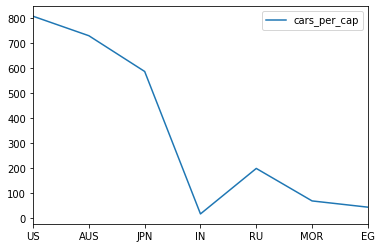

In [108]:
#import matplotlib for plotting the data
import matplotlib.pyplot as plt

data_frame.plot()
plt.show()              #it only plotted only cars_per_cap since its the only numeric type